In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import sqlite3 

In [6]:
data=pd.read_csv("D:/New folder/Semester 3/ADY301m/file csv/Impact_of_Remote_Work_on_Mental_Health.csv")
data.head()



,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,Europe
4,49,Male,Sales,Consulting,32,Remote,35,12,North America


In [17]:
#lọc dl
df=data.loc[data["Work_Location"] == "Remote"]
df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Region
1,40,Female,Data Scientist,IT,3,Remote,52,4,Asia
4,49,Male,Sales,Consulting,32,Remote,35,12,North America
6,31,Prefer not to say,Sales,IT,24,Remote,51,7,Asia
10,33,Non-binary,Software Engineer,Finance,17,Remote,48,3,Oceania
12,40,Female,Marketing,Consulting,1,Remote,21,7,Europe


In [21]:
#Tạo kết nối đến SQLite database 
conn=sqlite3.connect(":memory:")

df.to_sql("Remote_work",conn ,index=False, if_exists= "replace" )

1737

In [22]:
#Truy Van
query="""
        SELECT Job_Role, AVG(Hours_Worked_Per_Week) AS "Average Hours Worked"
        FROM Remote_work 
        Group by Industry

"""

result=pd.read_sql_query(query, conn)
pd.set_option('display.width', 1000)
print(result)

            Job_Role  Average Hours Worked
0              Sales             39.118421
1                 HR             39.345833
2  Software Engineer             38.698842
3              Sales             39.110672
4     Data Scientist             40.361789
5    Project Manager             40.812261
6    Project Manager             38.872000


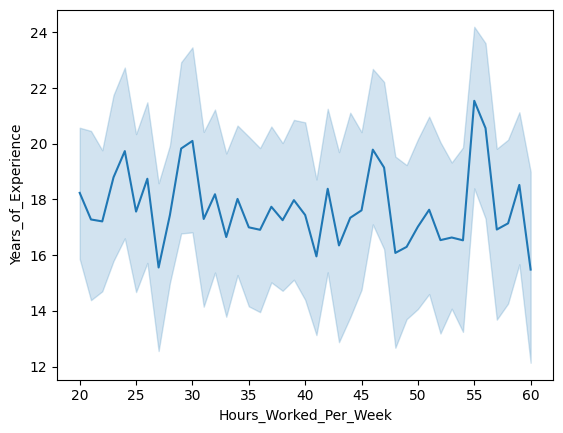

In [27]:
#Visualization
sns.lineplot(data=df, x="Hours_Worked_Per_Week", y="Years_of_Experience")
plt.show()